In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

Using TensorFlow backend.


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
#注意：索引减去了3，因为0、1、2是为"padding"(填充)、"start of sequence"(序列开始)、'unknown'(未知词)分别保留的索引
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]])

557056/550378 [==============================] - 9s 17us/step


In [7]:
decoded_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 将训练数据向量化
x_test = vectorize_sequences(test_data) # 将测试数据向量化

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)  #将训练标签向量化
one_hot_test_labels = to_one_hot(test_labels) #将测试标签向量化

one_hot_train_labels.shape

(8982, 46)

In [12]:
one_hot_train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

模型定义

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 242us/step - loss: 2.5320 - acc: 0.4951 - val_loss: 1.7230 - val_acc: 0.6080
Epoch 2/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.4504 - acc: 0.6868 - val_loss: 1.3506 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.1008 - acc: 0.7641 - val_loss: 1.1731 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.8735 - acc: 0.8147 - val_loss: 1.0804 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.7061 - acc: 0.8477 - val_loss: 0.9861 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5690 - acc: 0.8799 - val_loss: 0.9402 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.4614 - a

<function matplotlib.pyplot.show(*args, **kw)>

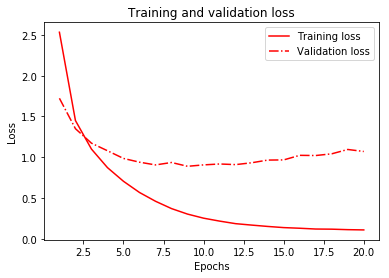

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

epochs = range(1, len(history.history['loss']) +1)

plt.plot(epochs,history.history['loss'], 'r', label='Training loss')
plt.plot(epochs,history.history['val_loss'],'r-.',label='Validation loss')
#plt.plot(epochs,history.history['acc'],'b', label='Training acc')
#plt.plot(epochs,history.history['val_acc'],'b:',label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [23]:
results = model.evaluate(x_test,one_hot_test_labels)
results

2246/2246 [==============================] - 1s 237us/step


[1.2144861070576887, 0.7809439003202179]

<function matplotlib.pyplot.show(*args, **kw)>

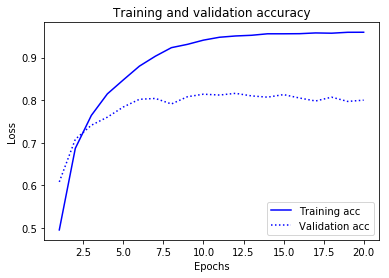

In [27]:
plt.clf()

#plt.plot(epochs,history.history['loss'], 'ro', label='Training loss')
#plt.plot(epochs,history.history['val_loss'],'r-.',label='Validation loss')
plt.plot(epochs,history.history['acc'],'b', label='Training acc')
plt.plot(epochs,history.history['val_acc'],'b:',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [29]:
predictions = model.predict(x_test)

predictions.shape

(2246, 46)

In [30]:
predictions[0]

array([1.10148540e-06, 8.78120375e-07, 5.48528822e-09, 9.78720665e-01,
       1.96025427e-02, 2.60419131e-09, 4.88721996e-09, 1.48677145e-05,
       2.99781939e-04, 4.51085754e-07, 3.03454840e-06, 1.78753107e-04,
       1.79599010e-05, 6.83991459e-08, 9.73574785e-08, 1.82743662e-07,
       1.86634410e-04, 2.09371547e-06, 2.10351413e-06, 6.03029766e-05,
       7.57933885e-04, 7.96599270e-05, 1.05788286e-06, 2.74364869e-08,
       3.39120760e-07, 3.39571073e-08, 1.00549756e-10, 5.33082073e-07,
       1.21439944e-05, 3.57425051e-07, 3.08637245e-05, 1.93090983e-08,
       6.72946135e-06, 8.77001867e-08, 5.71225473e-06, 2.72299985e-07,
       1.08073255e-05, 6.37184172e-08, 8.51636116e-07, 2.87122539e-08,
       2.69964602e-07, 5.02411183e-07, 1.51019748e-07, 3.06361581e-09,
       1.38943990e-09, 9.43350176e-10], dtype=float32)

In [31]:
np.sum(predictions[0])

1.0

In [32]:
np.argmax(predictions[0])

3

In [33]:
test_labels[0]

3

In [3]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)